**1.1** 参考用に「TensorFlowで学ぶディープラーニング入門」と「ゼロから作るDeep Learning」の資料をcloneする  
（このハンズオン資料の作り方は上記「TensorFlowで学ぶディープラーニング入門」の演習資料の作り方をそのまま参考にしています）

In [0]:
!git clone https://github.com/enakai00/jupyter_tfbook

In [0]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch

**1.2** pythonの書き方を少しだけ解説します。

In [0]:
a = 12.3
b = "test"

In [2]:
print(a, b)

12.3 test


In [0]:
a = [2, 3, 4, 5]

In [4]:
print(a)

[2, 3, 4, 5]


In [5]:
a[3]

5

In [0]:
import numpy as np

In [0]:
A = np.array([2, -1])

In [8]:
print(A)

[ 2 -1]


In [9]:
print(A + 2)

[4 1]


In [10]:
print(A * 3)

[ 6 -3]


In [11]:
B = np.array([2, 3])
print(A * 3 + B)

[8 0]


In [0]:
B = np.array([[1, 2],[2, 3]])

In [13]:
print(B)

[[1 2]
 [2 3]]


In [14]:
print(B[0][1])

2


In [0]:
def h(x):
    if x > 0.0:
        return 1.0
    else:
        return 0.0

In [17]:
h(-1)

0.0

In [18]:
h(10)

1.0

In [19]:
for i in range(-2, 2):
    print(i, h(i))

-2 0.0
-1 0.0
0 0.0
1 1.0


**1.3** 手でニューロンの動きを計算したのと同じものを書きます。

In [0]:
X = np.array([5, 0])

In [0]:
W = np.array([1, 2])

In [0]:
b = 16

In [0]:
def h(x):
    if x > 0.0:
        return 1.0
    else:
        return 0.0

In [0]:
def output_perceptron(w, x):
    s = 0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    print("W:" + str(w) + " X:" + str(x) + " y:" + str(y))
    return y

**写経** output_perceptronを写経します。printはコピーしてください。

In [25]:
output_perceptron(W, X)

W:[1 2] X:[5 0] y:0.0


0.0

In [0]:
alpha = 1

In [0]:
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    for i in range(len(w)):
        x1 = 1 if x[i] > 0 else 0
        dw = alpha*(t - y)*x1 # 本来のパーセプトロンでは alpha*(t - y)*x[i]
        w[i] += dw
        print("dw:" + str(dw) + " t:" + str(t) + " y:" + str(y) + " xi:" + str(x[i]))
        print("t:" + str(t) + " y:" + str(y) + " x:" + str(x[i]) + " h(x):" + str(h(x[i])) + " dw:" + str(dw))

**写経** train_perceptronを写経します。printはコピーしてください。コメントは入力しなくてよいです。

In [0]:
train_perceptron(W, X, 1)

In [0]:
print(W)

In [0]:
data    = np.array([[5, 0], [0, 4], [1, 1], [3, 4], [2, 3], [1, 3], [2, 1], [0, 2], [2, 2], [3, 0]])
teacher = np.array([ 1,      1,      0,      1,      1,      1,      0,      0,      1,      0    ])

In [0]:
def train(train_count):
    for count in range(train_count):
        i = np.random.randint(10)
        x = data[i]
        t = teacher[i]
        train_perceptron(W, x, t)
        print(W)

In [0]:
W = np.array([1, 3])
b = 16
alpha = 1
train(30)

In [0]:
W = np.array([1.0, 3.0])
b = 16
alpha = 0.1
train(100)

**1.4** MNISTの手書き数字データを扱えるようにします。

In [27]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
images, labels = mnist.train.next_batch(10)

28x28の画素データが784個の数字1列で並んでいて、答のラベルは0～9で何番目が1になっているかで判断できます。

In [29]:
print(images[1])
print(labels[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
import matplotlib.pyplot as plt

2


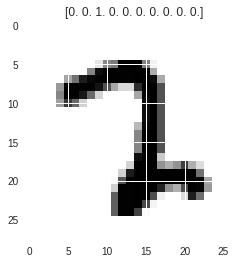

In [33]:
fig = plt.figure(figsize=(8,4))
plt.title(labels[1])
plt.imshow(images[1].reshape((28,28)), vmin=0, vmax=1,
           cmap=plt.cm.gray_r, interpolation="nearest")
print(np.argmax(labels[1]))

**1.5** ほぼ同じコードでMNISTの学習と判定を試してみます。  
修正点は
- 学習で入力の大きさを重みの変更量に掛ける（一般的なパーセプトロン）に変更
- 学習時のパラメータ表示削除
- 二乗誤差を算出して学習の進み具合を表示

In [0]:
def h(x):
    if x > 0.0:
        return 1.0
    else:
        return 0.0

In [0]:
def output_perceptron(w, x):
    # s = np.sum(w*x)
    s = 0.0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    return y

In [0]:
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    for i in range(len(w)):
        dw = alpha*(t - y)*x[i]
        w[i] += dw
    square_error = np.square(t - y)
    return square_error

In [0]:
def train_layer(neurons_w, data, teacher):
    square_error = 0.0
    for i in range(len(neurons_w)):
        square_error += train_perceptron(neurons_w[i], data, teacher[i])
    return square_error

In [0]:
def train_mnist(train_count):
    images, labels = mnist.train.next_batch(train_count)
    square_error = 0.0
    for i in range(len(images)):
        x = images[i]
        t = labels[i]
        square_error += train_layer(neurons_w, x, t)
    print(square_error/train_count/10) # 1ニューロンあたりの誤差

余力のある方は写経するか、同じことをするもっと良いコードを書いてみてください。

**1.6** 初期値を設定してとりあえず1回学習してみます。

In [39]:
neurons_w = np.random.rand(10, 28*28) * 0.1
b = 0.1
alpha = 0.01
train_mnist(1)

0.9


何度か学習させてみます。学習が進んだら学習係数を小さくしてすすめてみます。

In [48]:
train_mnist(100)

0.06899999999999999


In [49]:
train_mnist(1000)

0.056799999999999996


In [52]:
alpha = 0.001
train_mnist(1000)

0.0379


**1.7** テストデータで認識されるかテストしてみます。

In [0]:
def test_mnist():
    images, labels = mnist.test.next_batch(1)
    x = images[0]
    t = labels[0]
    y = np.zeros(10)
    for i in range(len(neurons_w)):
        y[i] = output_perceptron(neurons_w[i], x)
    print(t)
    print(y)
    print(np.argmax(y))
    # イメージ表示
    fig = plt.figure(figsize=(8,4))
    plt.imshow(x.reshape((28,28)), vmin=0, vmax=1,cmap=plt.cm.gray_r, interpolation="nearest")


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
5


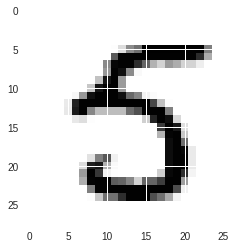

In [82]:
test_mnist()

In [0]:
def test_mnist_error():
    test_count = 1000
    images, labels = mnist.test.next_batch(test_count)
    ng = 0
    for j in range(len(images)):
        x = images[j]
        t = labels[j]
        y = np.zeros(10)
        for i in range(len(neurons_w)):
            y[i] = output_perceptron(neurons_w[i], x)
        if np.argmax(t) != np.argmax(y):
            ng += 1
    print(ng / test_count)

In [86]:
test_mnist_error()

0.212


In [87]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

cat: '/proc/driver/nvidia/gpus/0000:00:04.0/information': No such file or directory
